In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [3]:
X.shape

(178, 13)

In [4]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
df = X.join(pd.Series(y, name='class'))
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [13]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [16]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((13,13))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
        
        s += (x - mc).dot((x - mc).transpose)
    
    within_class_scatter_matrix += s

In [27]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [29]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [32]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

9.081739435042467
4.12846904563949
9.023494379356112e-16
9.023494379356112e-16
8.881784197001252e-16
7.592071616595672e-16
7.592071616595672e-16
6.154140305895767e-16
5.297517943327153e-16
1.6780055578861427e-16
1.368265677031893e-16
7.695882477415637e-17
7.695882477415637e-17


In [33]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.6874788878860778
Eigenvector 1: 0.3125211121139221
Eigenvector 2: 6.830697935276103e-17
Eigenvector 3: 6.830697935276103e-17
Eigenvector 4: 6.72342469839866e-17
Eigenvector 5: 5.747124754085441e-17
Eigenvector 6: 5.747124754085441e-17
Eigenvector 7: 4.658624665080281e-17
Eigenvector 8: 4.0101698251575786e-17
Eigenvector 9: 1.2702339712049101e-17
Eigenvector 10: 1.0357638783920677e-17
Eigenvector 11: 5.825708571268777e-18
Eigenvector 12: 5.825708571268777e-18


In [46]:
pairs[0][1].reshape(13,1)

array([[-0.1437+0.j],
       [ 0.0589+0.j],
       [-0.1315+0.j],
       [ 0.0551+0.j],
       [-0.0008+0.j],
       [ 0.2201+0.j],
       [-0.5917+0.j],
       [-0.5328+0.j],
       [ 0.0478+0.j],
       [ 0.1265+0.j],
       [-0.2914+0.j],
       [-0.4123+0.j],
       [-0.001 +0.j]])

In [47]:
pairs[1][1].reshape(13,1)

array([[-2.5445e-01+0.j],
       [-8.9130e-02+0.j],
       [-6.8467e-01+0.j],
       [ 4.2724e-02+0.j],
       [ 1.3506e-04+0.j],
       [ 9.4018e-03+0.j],
       [ 1.4360e-01+0.j],
       [ 4.7602e-01+0.j],
       [ 8.9628e-02+0.j],
       [-7.3909e-02+0.j],
       [ 4.4236e-01+0.j],
       [-1.4939e-02+0.j],
       [-8.3269e-04+0.j]])

In [39]:
#pick the first two vectors (0 and 1), because we want to reduce from 13 dimensions to 2
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

In [48]:
w_matrix

array([[-1.4368e-01, -2.5445e-01],
       [ 5.8860e-02, -8.9130e-02],
       [-1.3146e-01, -6.8467e-01],
       [ 5.5136e-02,  4.2724e-02],
       [-7.7060e-04,  1.3506e-04],
       [ 2.2014e-01,  9.4018e-03],
       [-5.9168e-01,  1.4360e-01],
       [-5.3278e-01,  4.7602e-01],
       [ 4.7761e-02,  8.9628e-02],
       [ 1.2646e-01, -7.3909e-02],
       [-2.9137e-01,  4.4236e-01],
       [-4.1230e-01, -1.4939e-02],
       [-9.5856e-04, -8.3269e-04]])

In [49]:
X_lda = np.array(X.dot(w_matrix))

In [55]:
le = LabelEncoder()
y = le.fit_transform(df['class'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

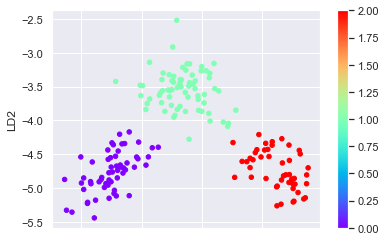

In [56]:
plotDF = pd.DataFrame(X_lda, columns=['LD1','LD2'])
plotDF.plot.scatter(x='LD1',y='LD2', c=y, colormap = 'rainbow')